# Prediction Premis Cd by Los-Angles Crime Dataset

In [334]:
import pandas as pd
import numpy as np
from numpy import absolute
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score,r2_score
from sklearn.model_selection import cross_val_score
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

### Import  Data Set

In [237]:
df = pd.read_csv('C:\\Users\\Galaxy Computers\\Desktop\\Crime_Data_from_2020_to_Present.csv')

### Data Statistics 

In [238]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [239]:
df.tail(4)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
752907,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
752908,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
752909,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
752910,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


In [240]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DR_NO,752911.0,2.147860e+08,1.028819e+07,817.0000,2.021116e+08,2.119101e+08,2.215044e+08,2.399165e+08
TIME OCC,752911.0,1.334820e+03,6.537894e+02,1.0000,9.000000e+02,1.415000e+03,1.900000e+03,2.359000e+03
AREA,752911.0,1.071771e+01,6.092023e+00,1.0000,6.000000e+00,1.100000e+01,1.600000e+01,2.100000e+01
Rpt Dist No,752911.0,1.118177e+03,6.092138e+02,101.0000,6.220000e+02,1.142000e+03,1.618000e+03,2.199000e+03
Part 1-2,752911.0,1.415733e+00,4.928483e-01,1.0000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Crm Cd,752911.0,5.008875e+02,2.079800e+02,110.0000,3.310000e+02,4.420000e+02,6.260000e+02,9.560000e+02
Vict Age,752911.0,2.991744e+01,2.173006e+01,-2.0000,1.100000e+01,3.100000e+01,4.500000e+01,1.200000e+02
Premis Cd,752902.0,3.059610e+02,2.168133e+02,101.0000,1.010000e+02,2.030000e+02,5.010000e+02,9.740000e+02
Weapon Used Cd,261472.0,3.625872e+02,1.237182e+02,101.0000,3.090000e+02,4.000000e+02,4.000000e+02,5.160000e+02
Crm Cd 1,752901.0,5.006285e+02,2.077704e+02,110.0000,3.310000e+02,4.420000e+02,6.260000e+02,9.560000e+02


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752911 entries, 0 to 752910
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           752911 non-null  int64  
 1   Date Rptd       752911 non-null  object 
 2   DATE OCC        752911 non-null  object 
 3   TIME OCC        752911 non-null  int64  
 4   AREA            752911 non-null  int64  
 5   AREA NAME       752911 non-null  object 
 6   Rpt Dist No     752911 non-null  int64  
 7   Part 1-2        752911 non-null  int64  
 8   Crm Cd          752911 non-null  int64  
 9   Crm Cd Desc     752911 non-null  object 
 10  Mocodes         649650 non-null  object 
 11  Vict Age        752911 non-null  int64  
 12  Vict Sex        654681 non-null  object 
 13  Vict Descent    654675 non-null  object 
 14  Premis Cd       752902 non-null  float64
 15  Premis Desc     752476 non-null  object 
 16  Weapon Used Cd  261472 non-null  float64
 17  Weapon Des

## Preprocessing

### Replace Blanks with Median

In [242]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           103261
Vict Age               0
Vict Sex           98230
Vict Descent       98236
Premis Cd              9
Premis Desc          435
Weapon Used Cd    491439
Weapon Desc       491439
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          697204
Crm Cd 3          751044
Crm Cd 4          752855
LOCATION               0
Cross Street      631859
LAT                    0
LON                    0
dtype: int64

In [243]:
#Droping unsuccessful columns 
df = df.drop(['Cross Street','Crm Cd 4','Crm Cd 3','Crm Cd 2','Weapon Desc','Weapon Used Cd','Vict Descent','Vict Sex','Mocodes'],axis=1)

In [244]:
#numeric variables
df.select_dtypes(exclude='object').isnull().sum()

DR_NO           0
TIME OCC        0
AREA            0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Vict Age        0
Premis Cd       9
Crm Cd 1       10
LAT             0
LON             0
dtype: int64

In [245]:
median_value = df['Crm Cd 1'].median()
df['Crm Cd 1'] = df['Crm Cd 1'].fillna(median_value)

###### Premis Cd column

In [246]:
df['Premis Cd'].isnull().sum()

9

In [247]:
df['Premis Cd'] = df['Premis Cd'].fillna(median_value)

#### Replace Blanks with Most Probable Values

In [248]:
df.select_dtypes(include='object').isnull().sum()

Date Rptd        0
DATE OCC         0
AREA NAME        0
Crm Cd Desc      0
Premis Desc    435
Status           0
Status Desc      0
LOCATION         0
dtype: int64

In [249]:
cleaner = SimpleImputer(strategy='most_frequent')

In [250]:
value = df['Premis Desc'].values.reshape(-1, 1)


In [251]:
df['Premis Desc'] = cleaner.fit_transform(value)

In [252]:
df.isnull().sum()

DR_NO          0
Date Rptd      0
DATE OCC       0
TIME OCC       0
AREA           0
AREA NAME      0
Rpt Dist No    0
Part 1-2       0
Crm Cd         0
Crm Cd Desc    0
Vict Age       0
Premis Cd      0
Premis Desc    0
Status         0
Status Desc    0
Crm Cd 1       0
LOCATION       0
LAT            0
LON            0
dtype: int64

In [253]:
#transforming date columns to datetime fromat
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


### Encoding Categorical Variables

In [254]:
 df.select_dtypes(include='object')

,AREA NAME,Crm Cd Desc,Premis Desc,Status,Status Desc,LOCATION
0,Southwest,BATTERY - SIMPLE ASSAULT,SINGLE FAMILY DWELLING,AO,Adult Other,1100 W 39TH PL
1,Central,BATTERY - SIMPLE ASSAULT,SIDEWALK,IC,Invest Cont,700 S HILL ST
2,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,POLICE FACILITY,AA,Adult Arrest,200 E 6TH ST
3,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,5400 CORTEEN PL
4,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",BEAUTY SUPPLY STORE,IC,Invest Cont,14400 TITUS ST
...,...,...,...,...,...,...
752906,N Hollywood,"BUNCO, GRAND THEFT",OTHER PREMISE,IC,Invest Cont,5300 DENNY AV
752907,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,12500 BRANFORD ST
752908,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",SIDEWALK,IC,Invest Cont,12800 FILMORE ST
752909,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",LAUNDROMAT,IC,Invest Cont,6100 S VERMONT AV


In [255]:
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].nunique())

AREA NAME 21
Crm Cd Desc 138
Premis Desc 306
Status 6
Status Desc 6
LOCATION 62528


##### AREA NAME column

In [256]:

df['AREA NAME'].unique()

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Devonshire',
       'Northeast', 'Harbor', 'Van Nuys', 'West Valley', 'West LA',
       'Wilshire', 'Pacific', 'Rampart', '77th Street', 'Hollenbeck',
       'Southeast', 'Hollywood', 'Newton', 'Topanga', 'Foothill',
       'Olympic'], dtype=object)

In [257]:
le = LabelEncoder()

In [258]:
df['AREA NAME'] = le.fit_transform(df['AREA NAME'])

##### Crm Cd Desc column

In [259]:
df['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
       'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BURGLARY', 'VEHICLE - STOLEN',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'BUNCO, GRAND THEFT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'VIOLAT

In [260]:
CrimeType = df['Crm Cd Desc'].apply(lambda x: x.split(' ')[0])
CrimeType

0           BATTERY
1           BATTERY
2               SEX
3         VANDALISM
4         VANDALISM
            ...    
752906       BUNCO,
752907    VANDALISM
752908      ASSAULT
752909      ASSAULT
752910    VANDALISM
Name: Crm Cd Desc, Length: 752911, dtype: object

In [261]:
df.drop(columns=['Crm Cd Desc'], axis=1, inplace=True)

In [262]:
df.insert(5,'CrimeType',CrimeType)

In [263]:
df['CrimeType'] = le.fit_transform(df['CrimeType'])

##### Premis Desc Column

In [264]:
df['Premis Desc'].unique()

array(['SINGLE FAMILY DWELLING', 'SIDEWALK', 'POLICE FACILITY',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'BEAUTY SUPPLY STORE', 'NIGHT CLUB (OPEN EVENINGS ONLY)',
       'DEPARTMENT STORE', 'OTHER BUSINESS', 'STREET', 'PARKING LOT',
       'HOTEL', "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)",
       'ALLEY', 'CONDOMINIUM/TOWNHOUSE', 'PUBLIC RESTROOM/OUTSIDE*',
       'GARAGE/CARPORT', 'MTA BUS',
       'NURSING/CONVALESCENT/RETIREMENT HOME', 'MINI-MART',
       'VEHICLE, PASSENGER/TRUCK', 'OTHER STORE', 'GROUP HOME',
       'MTA - RED LINE - UNION STATION', 'RESTAURANT/FAST FOOD',
       'MTA - RED LINE - PERSHING SQUARE', 'DRUG STORE',
       'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       'PARKING UNDERGROUND/BUILDING', 'MOTEL', 'HOSPITAL', 'DRIVEWAY',
       'MARKET', 'LA UNION STATION (NOT LINE SPECIFIC)',
       'MISSIONS/SHELTERS', 'BAR/COCKTAIL/NIGHTCLUB', 'TOW YARD*',
       'DETEN

In [265]:
CrimeSituation = df['Premis Desc'].apply(lambda x: x.split(' ')[0])
CrimeSituation

0             SINGLE
1           SIDEWALK
2             POLICE
3         MULTI-UNIT
4             BEAUTY
             ...    
752906         OTHER
752907      VEHICLE,
752908      SIDEWALK
752909    LAUNDROMAT
752910    MULTI-UNIT
Name: Premis Desc, Length: 752911, dtype: object

In [266]:
df.drop(columns=['Premis Desc'], axis=1, inplace=True)

In [267]:
df.insert(5,'CrimeSituation',CrimeSituation)

In [268]:
df['CrimeSituation'] = le.fit_transform(df['CrimeSituation'])

##### drop this column

In [269]:
 df['Status'].unique()
df.drop(columns=['Status'], axis=1, inplace=True)

##### Status Desc Column

In [270]:
df['Status Desc'].unique()

array(['Adult Other', 'Invest Cont', 'Adult Arrest', 'Juv Arrest',
       'Juv Other', 'UNK'], dtype=object)

In [271]:
ohe = OneHotEncoder(sparse=False)
df['Status Desc'] = ohe.fit_transform(df['Status Desc'].values.reshape(-1, 1))

##### LOCATION Column

In [272]:
df['LOCATION'].unique() 

array(['1100 W  39TH                         PL',
       '700 S  HILL                         ST',
       '200 E  6TH                          ST', ...,
       '11100    DULCET                       AV',
       '3600    COLISEUM                     ST',
       '6400 N  FIGUEROAA                    ST'], dtype=object)

In [273]:
df.drop(columns=['LOCATION'], axis=1, inplace=True)
df.drop(columns=['DR_NO'], axis=1, inplace=True)

In [274]:
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,CrimeSituation,CrimeType,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Status Desc,Crm Cd 1,LAT,LON
0,2020-01-08,2020-01-08,2230,3,152,3,15,377,2,624,36,501.0,0.0,624.0,34.0141,-118.2978
1,2020-01-02,2020-01-01,330,1,151,3,1,163,2,624,25,102.0,0.0,624.0,34.0459,-118.2545
2,2020-04-14,2020-02-13,1200,1,134,66,1,155,2,845,0,726.0,1.0,845.0,34.0448,-118.2474
3,2020-01-01,2020-01-01,1730,15,113,83,8,1543,2,745,76,502.0,0.0,745.0,34.1685,-118.4019
4,2020-01-01,2020-01-01,415,19,19,83,7,1998,2,740,31,409.0,0.0,740.0,34.2198,-118.4468


In [275]:
data = df.copy()

In [276]:
data.drop(columns=['Date Rptd','DATE OCC'],axis=1, inplace=True)

In [277]:
len(data.columns)

14

### Vizulation data

<AxesSubplot:xlabel='AREA', ylabel='Count'>

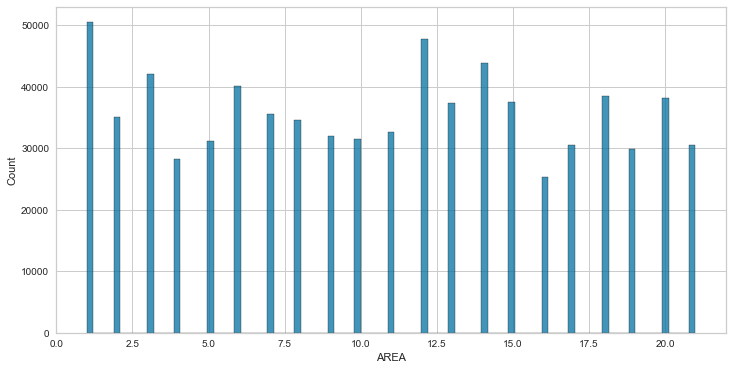

In [278]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data['AREA'])

<AxesSubplot:xlabel='CrimeSituation', ylabel='Count'>

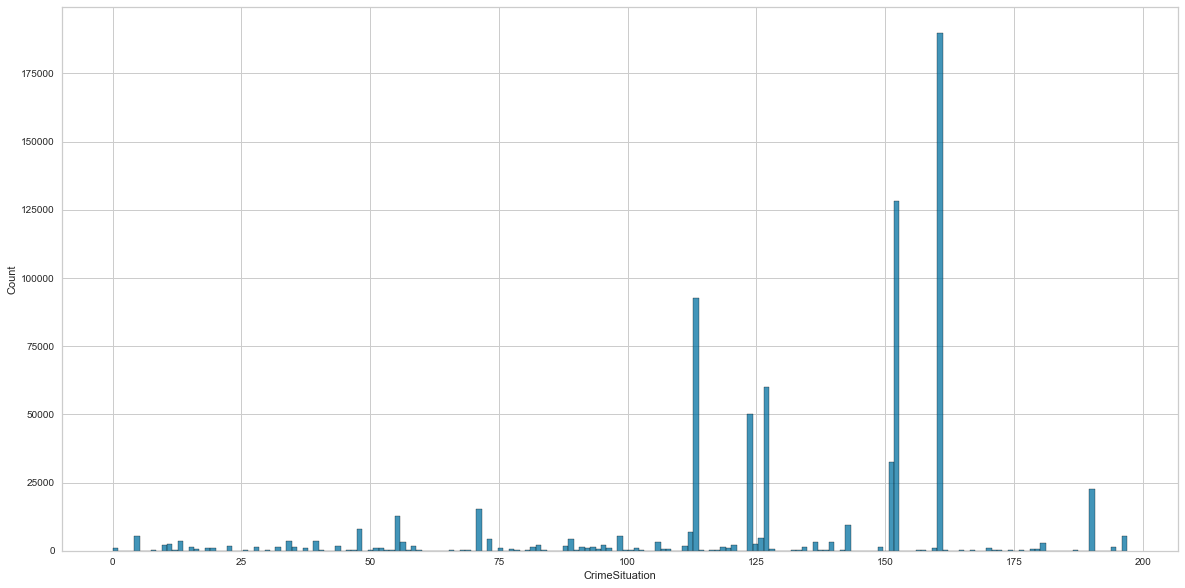

In [279]:
plt.figure(figsize=(20,10))
sns.histplot(data['CrimeSituation'])

<AxesSubplot:xlabel='AREA', ylabel='CrimeSituation'>

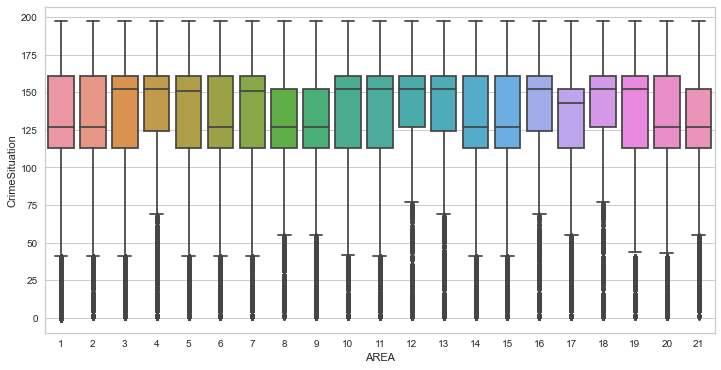

In [280]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= data['AREA'], y=data['CrimeSituation'])


<AxesSubplot:xlabel='AREA', ylabel='Vict Age'>

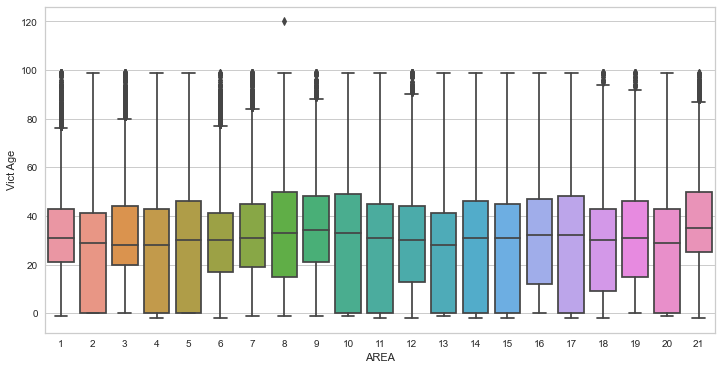

In [281]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= data['AREA'], y=data['Vict Age'])

<AxesSubplot:xlabel='AREA', ylabel='CrimeType'>

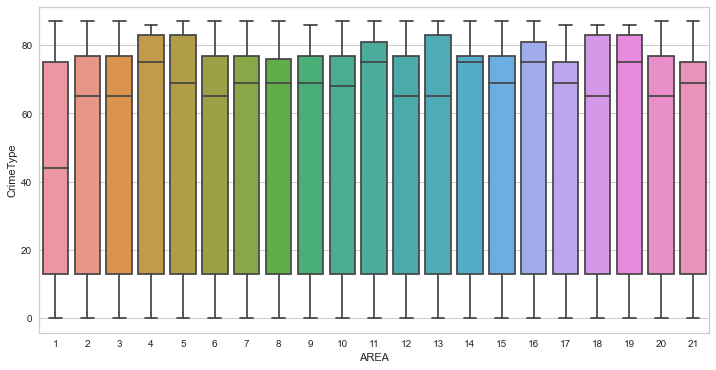

In [282]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= data['AREA'], y=data['CrimeType'])

<AxesSubplot:ylabel='AREA'>

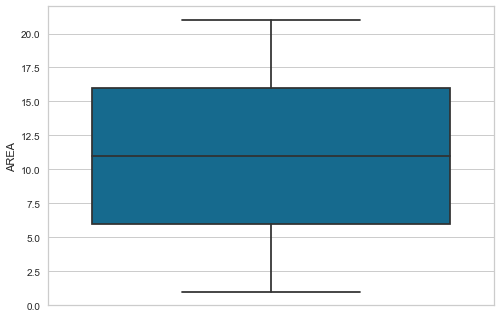

In [283]:
sns.boxplot(y = data['AREA'])

In [284]:
sns.pairplot(data)

### Split Data

In [285]:
y = data.pop('Premis Cd')

In [286]:
y.shape

(752911,)

In [287]:
x = data

In [288]:
x.shape

(752911, 13)

#### Correlation using  mutual information

In [289]:
selector = SelectKBest(mutual_info_regression, k= 6)

In [290]:
selector.fit(x,y)

SelectKBest(k=6,
            score_func=<function mutual_info_regression at 0x0000015EF8363DC0>)

In [291]:
selector.transform(x)

array([[ 1.520000e+02,  3.000000e+00,  3.770000e+02,  6.240000e+02,
         6.240000e+02, -1.182978e+02],
       [ 1.510000e+02,  3.000000e+00,  1.630000e+02,  6.240000e+02,
         6.240000e+02, -1.182545e+02],
       [ 1.340000e+02,  6.600000e+01,  1.550000e+02,  8.450000e+02,
         8.450000e+02, -1.182474e+02],
       ...,
       [ 1.510000e+02,  1.000000e+00,  1.602000e+03,  2.300000e+02,
         2.300000e+02, -1.184116e+02],
       [ 9.300000e+01,  1.000000e+00,  1.239000e+03,  2.300000e+02,
         2.300000e+02, -1.182915e+02],
       [ 1.130000e+02,  8.300000e+01,  9.140000e+02,  7.450000e+02,
         7.450000e+02, -1.184487e+02]])

In [292]:
x.columns[selector.get_support()]

Index(['CrimeSituation', 'CrimeType', 'Rpt Dist No', 'Crm Cd', 'Crm Cd 1',
       'LON'],
      dtype='object')

In [293]:
x = data[['CrimeSituation', 'CrimeType', 'Rpt Dist No', 'Crm Cd', 'Crm Cd 1',
       'LON']]

In [294]:
x

,CrimeSituation,CrimeType,Rpt Dist No,Crm Cd,Crm Cd 1,LON
0,152,3,377,624,624.0,-118.2978
1,151,3,163,624,624.0,-118.2545
2,134,66,155,845,845.0,-118.2474
3,113,83,1543,745,745.0,-118.4019
4,19,83,1998,740,740.0,-118.4468
...,...,...,...,...,...,...
752906,124,12,1548,662,662.0,-118.3643
752907,190,83,1663,740,740.0,-118.4054
752908,151,1,1602,230,230.0,-118.4116
752909,93,1,1239,230,230.0,-118.2915


In [295]:
y = y.values.reshape(-1,1)

In [296]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3)

In [297]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(527037, 6) (527037, 1) (225874, 6) (225874, 1)


## Decision Tree Regression 

In [298]:
dec = DecisionTreeRegressor().fit(x_train,y_train)

In [299]:
print('Training R_SQ:%.3f'% dec.score(x_train,y_train))

Training R_SQ:0.994


#### Training Model Evaluation 

In [300]:
y_train_prd = dec.predict(x_train)

In [301]:
print('r_sq:',r2_score(y_train,y_train_prd),
    'the MAE:',mean_absolute_error(y_train,y_train_prd),
    'the MsE:',mean_squared_error(y_train,y_train_prd),
    'The EVS:',explained_variance_score(y_train,y_train_prd))

r_sq: 0.9937683595647944 the MAE: 1.6508867796709121 the MsE: 292.7885638159966 The EVS: 0.9937683595647944


#### Test Model Evaluation 

In [302]:
y_test_pred = dec.predict(x_test)

In [303]:
print('Training R_SQ:%.3f'% dec.score(x_test,y_test_pred))

Training R_SQ:1.000


In [304]:
print('r_sq:',r2_score(y_test,y_test_pred),
    'the MAE:',mean_absolute_error(y_test,y_test_pred),
    'the MsE:',mean_squared_error(y_test,y_test_pred),
    'The EVS:',explained_variance_score(y_test,y_test_pred))

r_sq: 0.9336679795279039 the MAE: 8.729016053594046 the MsE: 3121.734408913013 The EVS: 0.9336680276679086


###### Prediction Eror

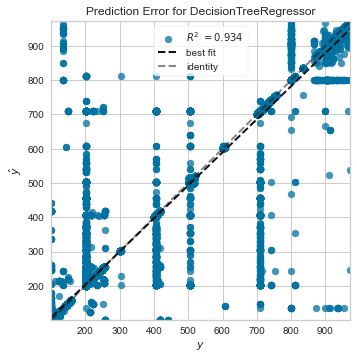

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [309]:
vizuluater = PredictionError(dec)
vizuluater.fit(x_train,y_train)
vizuluater.score(x_test,y_test)
vizuluater.poof()

###### k-fold Cross Validation 

In [321]:
#Train
score_train = cross_val_score(dec,x_train,y_train,scoring='neg_mean_squared_error',cv=16)

In [322]:
score_train = np.mean(score_train)

In [323]:
score_train

-3121.9665143772595

In [329]:
#To make it Positive
score_train = absolute(score_train)
score_train

3121.9665143772595

In [335]:
#Test
score_test = cross_val_score(dec,x_test,y_test,scoring='neg_mean_squared_error',cv=16)

In [336]:
score_test = np.mean(score_test)
score_test

-3411.047652805715

In [337]:
#To make it Positive
score_test = absolute(score_test)
score_test

3411.047652805715